# Student Data Challenge Jan 2018

In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from itertools import product
from collections import OrderedDict ### data structure.. for laziness
import seaborn as sns
import operator
%matplotlib inline

### new plain

In [25]:
# plain data
df = pd.read_csv('X_test.csv')
df.head()

,Doctor Identifier,Provider Type,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,...,Percent Depression,Percent Diabetes,Percent Hyperlipidemia,Percent Hypertension,Percent Ischemic Heart Disease,Percent Osteoporosis,Percent Rheumatoid Arthritis or Osteoarthritis,Percent Schizophrenia or Other Psychotic Disorders,Percent Stroke,Average HCC Risk Score of Beneficiaries
0,749706007,Ophthalmology,550,186,155243.0,38428.13,28159.90,32430.12,0,0.0,...,75.0,31.00,49.00,65.0,34.00,10.00,39.0,30.00,0.77,1.63
1,792886048,Mass Immunization Roster Biller,70,31,27977.0,6598.35,5126.31,5415.16,0,0.0,...,42.0,55.00,75.00,75.0,55.00,0.11,61.0,0.12,0.09,2.69
2,150847842,Internal Medicine,332,274,76368.0,32198.65,23587.80,27466.97,0,0.0,...,46.0,33.00,47.00,62.0,20.00,7.00,34.0,5.00,0.92,1.54
3,182353131,Family Practice,2166,89,142010.0,56909.87,43688.12,42211.25,0,0.0,...,21.0,16.00,51.00,52.0,19.00,0.68,72.0,0.63,0.53,0.87
4,752086922,Internal Medicine,46,19,7662.0,2260.71,1772.46,1439.11,0,0.0,...,0.1,0.14,0.29,75.0,0.17,0.05,0.2,0.01,0.00,3.14


In [26]:


# plain data
df2 = pd.read_csv('X_train.csv')
df2 = df2.drop(['Doctor Identifier'], axis = 1)
df2.head()

# plain data
df2_test = pd.read_csv('X_test.csv')
df2_test = df2_test.drop(['Doctor Identifier'], axis = 1)
df2_test.head()

,Provider Type,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,Total Drug Allowed Amount,...,Percent Depression,Percent Diabetes,Percent Hyperlipidemia,Percent Hypertension,Percent Ischemic Heart Disease,Percent Osteoporosis,Percent Rheumatoid Arthritis or Osteoarthritis,Percent Schizophrenia or Other Psychotic Disorders,Percent Stroke,Average HCC Risk Score of Beneficiaries
0,Ophthalmology,550,186,155243.0,38428.13,28159.90,32430.12,0,0.0,0.0,...,75.0,31.00,49.00,65.0,34.00,10.00,39.0,30.00,0.77,1.63
1,Mass Immunization Roster Biller,70,31,27977.0,6598.35,5126.31,5415.16,0,0.0,0.0,...,42.0,55.00,75.00,75.0,55.00,0.11,61.0,0.12,0.09,2.69
2,Internal Medicine,332,274,76368.0,32198.65,23587.80,27466.97,0,0.0,0.0,...,46.0,33.00,47.00,62.0,20.00,7.00,34.0,5.00,0.92,1.54
3,Family Practice,2166,89,142010.0,56909.87,43688.12,42211.25,0,0.0,0.0,...,21.0,16.00,51.00,52.0,19.00,0.68,72.0,0.63,0.53,0.87
4,Internal Medicine,46,19,7662.0,2260.71,1772.46,1439.11,0,0.0,0.0,...,0.1,0.14,0.29,75.0,0.17,0.05,0.2,0.01,0.00,3.14


In [27]:
print(df2.shape)
print(df2_test.shape)

(18000, 30)
(9743, 30)


In [28]:
# df_ohe2 = pd.get_dummies(df2, 'Provider Type')
# df_ohe2.head()

# df_ohe2_test = pd.get_dummies(df2_test, 'Provider Type')
# df_ohe2_test.head()

In [29]:
df2_nocat = df2.drop(['Provider Type'], axis = 1)
df2_test_nocat = df2_test.drop(['Provider Type'], axis =1)

In [30]:
df2_stand = (df2_nocat - df2_nocat.mean())/(df2_nocat.std())
df2_stand_test = (df2_test_nocat - df2_test_nocat.mean())/ (df2_test_nocat.std())

In [31]:
df2_stand_test.shape

(9743, 29)

In [32]:
df2_stand.shape

(18000, 29)

In [33]:
df2_stand_test.columns

Index(['Number of Services', 'Number of Beneficiaries',
       'Total Submitted Charge Amount', 'Total Allowed Amount',
       'Total Payment Amount', 'Total Standardized Payment Amount',
       'Number of Drug Services', 'Total Drug Submitted Charge Amount',
       'Total Drug Allowed Amount ', 'Total Drug Payment Amount ',
       'Total Drug Standardized Payment Amount', 'Number of Medical Services',
       'Percent Atrial Fibrillation',
       'Percent Alzheimer’s Disease or Dementia ', 'Percent Asthma ',
       'Percent Cancer ', 'Percent Heart Failure ',
       'Percent Chronic Kidney Disease',
       'Percent Chronic Obstructive Pulmonary Disease', 'Percent Depression ',
       'Percent Diabetes ', 'Percent Hyperlipidemia ', 'Percent Hypertension ',
       'Percent Ischemic Heart Disease ', 'Percent Osteoporosis ',
       'Percent Rheumatoid Arthritis or Osteoarthritis ',
       'Percent Schizophrenia or Other Psychotic Disorders ',
       'Percent Stroke ', 'Average HCC Risk Sco

### use pca

In [34]:
df2_stand.head()

,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,Total Drug Allowed Amount,Total Drug Payment Amount,...,Percent Depression,Percent Diabetes,Percent Hyperlipidemia,Percent Hypertension,Percent Ischemic Heart Disease,Percent Osteoporosis,Percent Rheumatoid Arthritis or Osteoarthritis,Percent Schizophrenia or Other Psychotic Disorders,Percent Stroke,Average HCC Risk Score of Beneficiaries
0,-0.054055,-0.149748,-0.119307,-0.114199,-0.104583,-0.107071,-0.082824,-0.049353,-0.059193,-0.061618,...,2.029613,-0.519895,-0.433808,-0.481535,-1.331699,-0.917456,-0.729602,0.888770,-0.577676,-0.424243
1,0.078102,-0.072822,-0.065654,-0.027317,-0.031873,-0.029775,0.895218,0.056516,0.095352,0.093158,...,0.402899,-0.147405,-0.083987,-0.191035,-0.364941,0.290397,0.091213,0.001469,0.689602,-0.070970
2,0.047712,0.150528,0.108427,0.303710,0.258498,0.242615,0.217930,0.067961,0.121605,0.117104,...,-0.484400,-0.457813,-0.283885,-0.142619,-0.211407,0.733917,1.678120,-0.240522,0.282988,-0.674479
3,-0.071510,-0.162481,-0.142895,-0.211279,-0.188993,-0.180335,-0.082824,-0.049353,-0.059193,-0.061618,...,-0.139340,-1.582111,0.615653,-0.142619,0.351554,-1.000246,0.091213,-0.527685,-0.631891,-0.836396
4,-0.067302,-0.166725,-0.138053,-0.208884,-0.183136,-0.182426,-0.082824,-0.049353,-0.059193,-0.061618,...,1.093020,3.018757,1.265320,0.728880,0.607445,-1.032771,1.076189,-0.563177,-0.661710,0.002629


In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
pca.fit(df2_stand)
X_train_pca = pca.transform(df2_stand)

np.sum(pca.explained_variance_ratio_)

0.84107554831932685

In [36]:
X_test_pca = pca.transform(df2_stand_test)

np.sum(pca.explained_variance_ratio_)

0.84107554831932685

### Try 1 class svm

In [37]:
from sklearn import svm

In [38]:
clf = svm.OneClassSVM(nu=0.001, kernel="rbf", gamma = 0.0001)

# np.random.seed(9001)
msk = np.random.rand(len(X_train_pca)) < 1

clf.fit(X_train_pca[msk])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.0001, kernel='rbf',
      max_iter=-1, nu=0.001, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [39]:
risk = clf.decision_function(X_test_pca)

In [40]:
print(np.mean(risk))

0.0648339317592


In [41]:
len(np.unique(risk))

9741

In [42]:
np.unique(risk)

array([-5.06729732, -3.35375874, -2.07465107, ...,  0.75210747,
        0.76238406,  0.79363105])

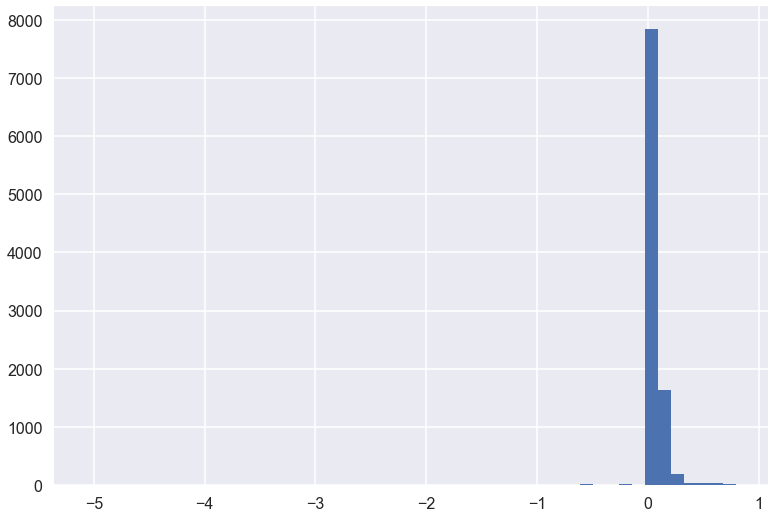

In [43]:
plt.hist(risk, bins = 50);

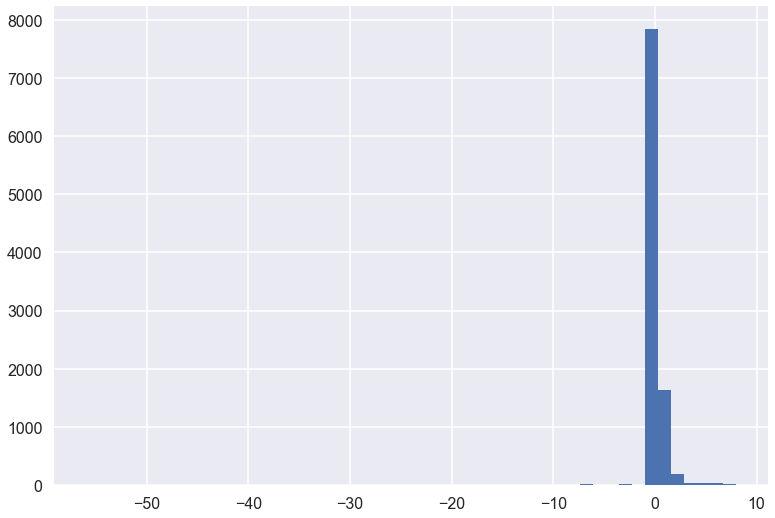

In [44]:
# standardize risk
sns.set_context('poster')
risk_std = (risk - risk.mean())/risk.std()
plt.hist(risk_std, bins = 50);

In [45]:
risk.shape

(9743, 1)

In [46]:
submission = pd.DataFrame(df['Doctor Identifier'])
submission['Risk'] = risk**2
submission.reset_index()
submission = submission.sort_values(['Risk'], ascending = False)

submission.to_csv('/Users/kate_zym/Documents/GitHub/datachallenge/svm_trainontrain.csv', index = False, header = True)

In [47]:
sumission.shape

NameError: name 'sumission' is not defined

In [48]:
df2_test.shape

(9743, 30)